In [20]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# MNIST veri setini yükleme ve eğitim/test setlerine ayırma
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Verileri CNN modeline uygun formata dönüştürme ve normalizasyon
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [3]:

# CNN modeli oluşturma
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Önceki Dropout katmanı
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Yeni Dropout katmanı
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Bir diğer Dropout katmanı
model.add(Dense(10, activation='softmax'))


c:\Users\havva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,818 (1.80 MB)

 Trainable params: 471,818 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from keras.callbacks import EarlyStopping
# Early stopping geri çağrısını oluşturma
early_stopper = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)


In [6]:
# Modeli eğitme
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels), callbacks=[early_stopper])

# Modelin başarımını yazdırma
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
# print("Eğitim Doğruluğu:", train_acc)
# print("Test Doğruluğu:", test_acc)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.7086 - loss: 0.8311 - val_accuracy: 0.9815 - val_loss: 0.0726
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.9774 - loss: 0.0901 - val_accuracy: 0.9863 - val_loss: 0.0517
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 75ms/step - accuracy: 0.9851 - loss: 0.0587 - val_accuracy: 0.9903 - val_loss: 0.0373
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.9893 - loss: 0.0457 - val_accuracy: 0.9899 - val_loss: 0.0438
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 99ms/step - accuracy: 0.9894 - loss: 0.0461 - val_accuracy: 0.9909 - val_loss: 0.0380
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 103ms/step - accuracy: 0.9913 - loss: 0.0390 - val_accuracy: 0.9896 - val_loss: 0.0500
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


In [16]:
model.save("../models/numbers_model.h5")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


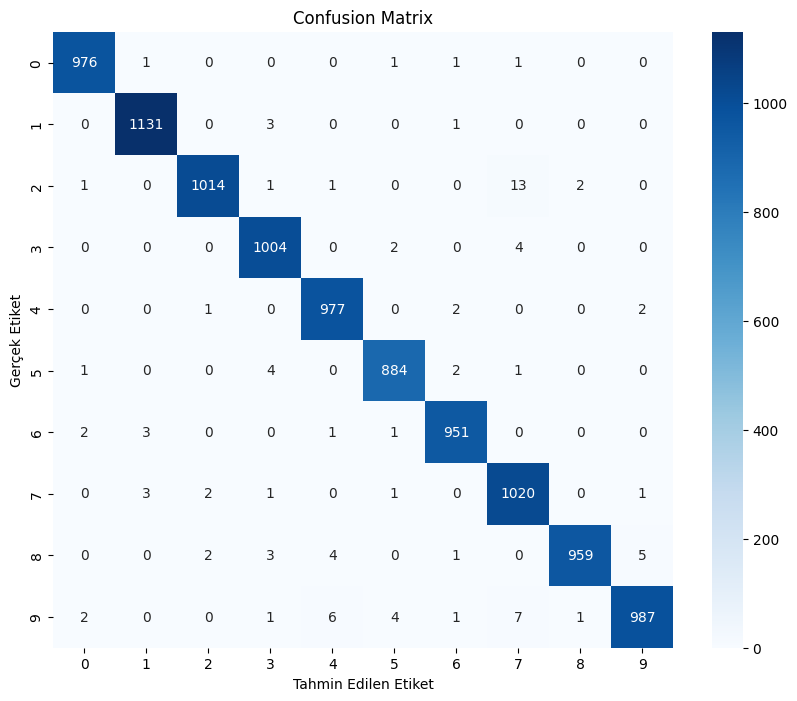

In [21]:
from sklearn.metrics import confusion_matrix
# Test verileri üzerinde tahmin yapın
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Confusion matrisini hesaplayın
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Confusion matrisini görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Model ile tahmin yapın
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
# Eğer y_test zaten etiketleri içeriyorsa (one-hot encoded değilse)
y_true = test_labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Metrikleri hesaplayın
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Detaylı sınıflandırma raporu
print(classification_report(y_true, y_pred_classes))


Accuracy: 0.9903
Precision: 0.9903457152792248
Recall: 0.9903
F1 Score: 0.9902998099230684
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [10]:

# Kayıp ve doğruluk grafiklerini çizmek için
def plot_history(history):
    # Kayıp
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Kaybı')

    # Doğruluk
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    
    plt.show()


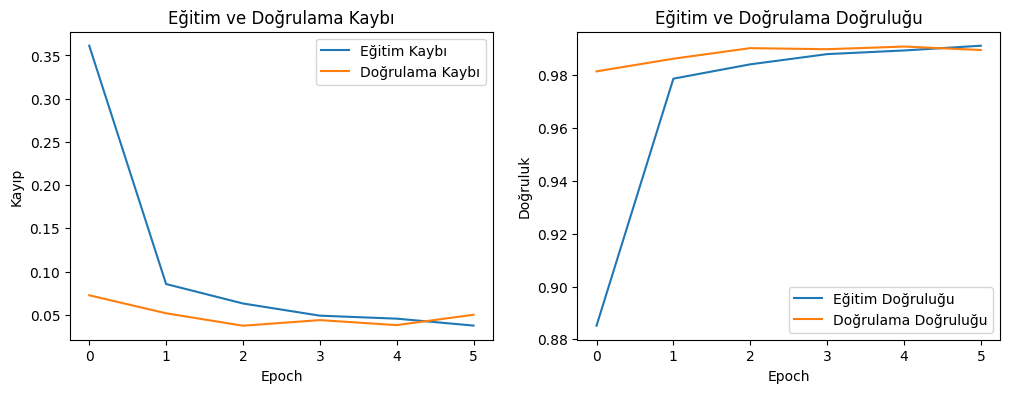

In [19]:
# history nesnesini kullanarak grafik çizme
plot_history(history)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image as keras_image

# Dışarıdan alınacak resimlerin yollarını belirtin
image_paths = [
    "../test_data/1.png",
    "../test_data/2.png",
    "../test_data/3.png",
    "../test_data/4.png",
    "../test_data/5.png",
    "../test_data/6.png",
    "../test_data/7.png",
    "../test_data/8.png",
    "../test_data/9.png",
]

# Resimleri gösterme ve tahmin yapma
plt.figure(figsize=(12, 8))
for i, path in enumerate(image_paths, 1):
    plt.subplot(3, 3, i)
    
    # Resmi yükleme ve gösterme
    img = plt.imread(path)
    plt.imshow(img)
    plt.axis('off')
    
    # Resmi modele uygun formata dönüştürme
    external_image = keras_image.load_img(path, target_size=(28, 28), color_mode='grayscale')
    external_image_array = keras_image.img_to_array(external_image)
    external_image_array = external_image_array.reshape(1, 28, 28, 1) / 255.0  # Normalizasyon
    
    # Modelde tahmin yapma
    predicted_label = np.argmax(model.predict(external_image_array), axis=-1)
    plt.title(f"Predicted: {predicted_label[0]}")
    
plt.tight_layout()
plt.show()
